In [1]:
import pandas as pd
import re

In [2]:
uniranking = pd.read_csv("uniranking.csv",header=1).reindex()
uniranking.head(10)

,Rank,Institution,Score,Authors,Author shares
0,1,"London School of Economics (LSE)\nLondon, Unit...",2.04,311,204.12
1,2,"World Bank Group\nWashington, District of Colu...",3.25,525,464.09
2,3,National Bureau of Economic Research (NBER)\nC...,3.77,454,89.96
3,4,"International Monetary Fund (IMF)\nWashington,...",4.25,413,378.56
4,5,"Department of Economics, Harvard University\nC...",4.65,69,59.65
5,6,"European Central Bank\nFrankfurt am Main, Germany",6.74,233,211.23
6,7,"Department of Economics, University of Califor...",8.35,59,47.14
7,8,"Economics Department, Massachusetts Institute ...",9.56,62,53.64
8,9,"Department of Economics, University of Chicago...",9.81,78,66.73
9,10,Federal Reserve Board (Board of Governors of t...,10.02,201,195.75


In [3]:
school_df = uniranking.Institution.apply(lambda x: x.split("\n"))
school_df = pd.DataFrame(school_df.to_list(),columns=["Institution", "Location"])

In [4]:
school_df

,Institution,Location
0,London School of Economics (LSE),"London, United Kingdom"
1,World Bank Group,"Washington, District of Columbia (USA)"
2,National Bureau of Economic Research (NBER),"Cambridge, Massachusetts (USA)"
3,International Monetary Fund (IMF),"Washington, District of Columbia (USA)"
4,"Department of Economics, Harvard University","Cambridge, Massachusetts (USA)"
...,...,...
545,"Economics Discipline Group, Business School, U...","Sydney, Australia"
546,"Facoltá di scienze economiche, Universitá dell...","Lugano, Switzerland"
547,"Sectie Economie, Wageningen Universiteit en Re...","Wageningen, Netherlands"
548,"Centro de Estudios Distributivos, Laborales y ...","La Plata, Argentina"


In [5]:
school_df["University"] = school_df["Institution"]
school_df.head(20)

,Institution,Location,University
0,London School of Economics (LSE),"London, United Kingdom",London School of Economics (LSE)
1,World Bank Group,"Washington, District of Columbia (USA)",World Bank Group
2,National Bureau of Economic Research (NBER),"Cambridge, Massachusetts (USA)",National Bureau of Economic Research (NBER)
3,International Monetary Fund (IMF),"Washington, District of Columbia (USA)",International Monetary Fund (IMF)
4,"Department of Economics, Harvard University","Cambridge, Massachusetts (USA)","Department of Economics, Harvard University"
5,European Central Bank,"Frankfurt am Main, Germany",European Central Bank
6,"Department of Economics, University of Califor...","Berkeley, California (USA)","Department of Economics, University of Califor..."
7,"Economics Department, Massachusetts Institute ...","Cambridge, Massachusetts (USA)","Economics Department, Massachusetts Institute ..."
8,"Department of Economics, University of Chicago","Chicago, Illinois (USA)","Department of Economics, University of Chicago"
9,Federal Reserve Board (Board of Governors of t...,"Washington, District of Columbia (USA)",Federal Reserve Board (Board of Governors of t...


In [6]:
# Split Institution by Comma
for rank, row in school_df.iterrows():
    ls = row.Institution.split(",")
    for ele in ls:
        if re.search("University",ele):
            row.loc["University"] = ele

for rank, row in school_df.iterrows():
    ls = row.University.split(",")
    if len(ls) > 0:
        row.loc["University"] = ls[-1]

In [7]:
school_df.head(20)

,Institution,Location,University
0,London School of Economics (LSE),"London, United Kingdom",London School of Economics (LSE)
1,World Bank Group,"Washington, District of Columbia (USA)",World Bank Group
2,National Bureau of Economic Research (NBER),"Cambridge, Massachusetts (USA)",National Bureau of Economic Research (NBER)
3,International Monetary Fund (IMF),"Washington, District of Columbia (USA)",International Monetary Fund (IMF)
4,"Department of Economics, Harvard University","Cambridge, Massachusetts (USA)",Harvard University
5,European Central Bank,"Frankfurt am Main, Germany",European Central Bank
6,"Department of Economics, University of Califor...","Berkeley, California (USA)",University of California-Berkeley
7,"Economics Department, Massachusetts Institute ...","Cambridge, Massachusetts (USA)",Massachusetts Institute of Technology (MIT)
8,"Department of Economics, University of Chicago","Chicago, Illinois (USA)",University of Chicago
9,Federal Reserve Board (Board of Governors of t...,"Washington, District of Columbia (USA)",Federal Reserve Board (Board of Governors of t...


In [22]:
# Replace out the () to lower the possible noise
school_df["University"] = school_df["University"].apply(lambda x: re.sub("\(.*\)","",x)).apply(lambda x: x.strip())


In [23]:
school_df

,Institution,Location,University
0,London School of Economics (LSE),"London, United Kingdom",London School of Economics
1,World Bank Group,"Washington, District of Columbia (USA)",World Bank Group
2,National Bureau of Economic Research (NBER),"Cambridge, Massachusetts (USA)",National Bureau of Economic Research
3,International Monetary Fund (IMF),"Washington, District of Columbia (USA)",International Monetary Fund
4,"Department of Economics, Harvard University","Cambridge, Massachusetts (USA)",Harvard University
...,...,...,...
545,"Economics Discipline Group, Business School, U...","Sydney, Australia",University of Technology Sydney
546,"Facoltá di scienze economiche, Universitá dell...","Lugano, Switzerland",Universitá della Svizzera Italiana
547,"Sectie Economie, Wageningen Universiteit en Re...","Wageningen, Netherlands",Wageningen Universiteit en Researchcentrum
548,"Centro de Estudios Distributivos, Laborales y ...","La Plata, Argentina",Universidad Nacional de La Plata


In [24]:
university_df = school_df[["University"]]

In [25]:
university_df

,University
0,London School of Economics
1,World Bank Group
2,National Bureau of Economic Research
3,International Monetary Fund
4,Harvard University
...,...
545,University of Technology Sydney
546,Universitá della Svizzera Italiana
547,Wageningen Universiteit en Researchcentrum
548,Universidad Nacional de La Plata


In [26]:
university_df = university_df.drop_duplicates()
university_df


,University
0,London School of Economics
1,World Bank Group
2,National Bureau of Economic Research
3,International Monetary Fund
4,Harvard University
...,...
541,Bilkent Üniversitesi
543,Royal Holloway
544,briq Institute on Behavior and Inequality
546,Universitá della Svizzera Italiana


In [27]:
university_df["rank"] = university_df.index + 1

/var/folders/ng/w01p2z6s6dzb2j7084t493kr0000gn/T/ipykernel_7693/1113886013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university_df["rank"] = university_df.index + 1


In [28]:
university_df

,University,rank
0,London School of Economics,1
1,World Bank Group,2
2,National Bureau of Economic Research,3
3,International Monetary Fund,4
4,Harvard University,5
...,...,...
541,Bilkent Üniversitesi,542
543,Royal Holloway,544
544,briq Institute on Behavior and Inequality,545
546,Universitá della Svizzera Italiana,547


In [29]:
university_df.to_csv("university_ranking.csv")

In [11]:
links = pd.read_csv("whichtresholdtochoose.csv")

In [14]:
links.match_score.count()

692

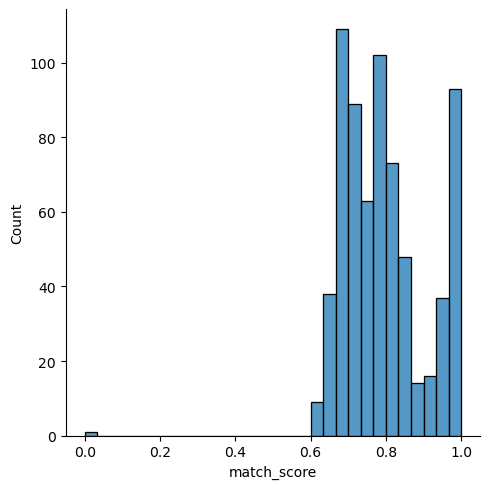

In [18]:
import seaborn as sns
sns.displot(links.match_score)